In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2023-08-21 20:41:54.220131: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-08-21 20:41:56.905818: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 20:41:56.907933: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-21 20:41:56.908486: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-08-21 20:41:56.921194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node ze

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

the dataset is already split into a training set and a test set, but
there is no validation set, so we’ll create one now. Additionally, since we
are going to train the neural network using Gradient Descent, we must scale
the input features. For simplicity, we’ll scale the pixel intensities down to
the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[2]]

'Sneaker'

### Creating the model using Sequential API

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))    #Flatten layer whose role is to convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

## Another way to do it

# model = keras.models.Sequential([
# keras.layers.Flatten(input_shape=[28, 28]),
# keras.layers.Dense(300, activation="relu"),
# keras.layers.Dense(100, activation="relu"),
# keras.layers.Dense(10, activation="softmax")
# ])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

First, we use the
"sparse_categorical_crossentropy" loss because we have sparse
labels (i.e., for each instance, there is just a target class index, from 0 to 9 in
this case), and the classes are exclusive.

Regarding the optimizer, "sgd" means that we will train the model using
simple Stochastic Gradient Descent.

Finally, since this is a classifier, it’s useful to measure its "accuracy"
during training and evaluation.

In [14]:
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

2023-08-21 20:56:25.726256: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-08-21 20:56:25.733236: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4099895000 Hz


Epoch 1/30


2023-08-21 20:56:25.957684: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1719/1719 [==============================] - 2s 887us/step - loss: 1.0118 - accuracy: 0.6773 - val_loss: 0.5101 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 1s 828us/step - loss: 0.5075 - accuracy: 0.8249 - val_loss: 0.4697 - val_accuracy: 0.8340
Epoch 3/30
1719/1719 [==============================] - 1s 816us/step - loss: 0.4553 - accuracy: 0.8392 - val_loss: 0.4452 - val_accuracy: 0.8510
Epoch 4/30
1719/1719 [==============================] - 1s 821us/step - loss: 0.4169 - accuracy: 0.8521 - val_loss: 0.4023 - val_accuracy: 0.8576
Epoch 5/30
1719/1719 [==============================] - 1s 823us/step - loss: 0.3957 - accuracy: 0.8602 - val_loss: 0.3844 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 1s 817us/step - loss: 0.3814 - accuracy: 0.8638 - val_loss: 0.3654 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 1s 816us/step - loss: 0.3722 - accuracy: 0.8665 - val_loss: 0.3630 - val_accura

The training loss went down, which is a good sign, and the validation accuracy reached 89.26% after 30 epochs.
That’s not too far from the training accuracy, so there does not seem to be
much overfitting going on.

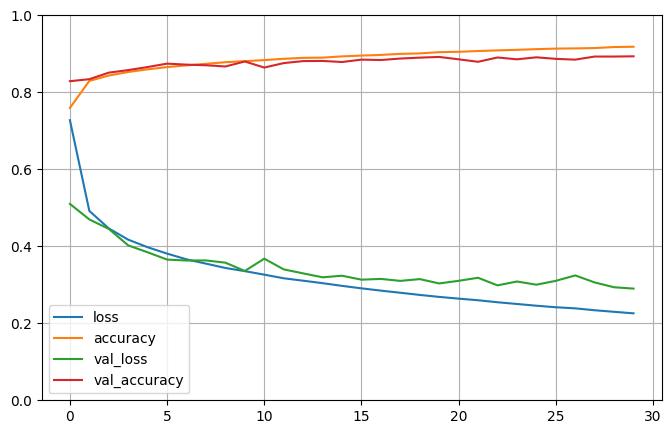

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 849us/step - loss: 65.4957 - accuracy: 0.8394


[65.49569702148438, 0.8393999934196472]

### Using the model to make predictions

In [25]:
X_new = X_test[:4]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred = model.predict_classes(X_new)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1 1]


/home/dlugano/.conda/envs/deeplearning/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser'], dtype='<U11')

In [31]:
y_new=y_test[:4]
print(y_new)

[9 2 1 1]
